# Customer Lifetime Value Analysis

# Total Value of Customers to the Business over the lifetime of their relationship.

Objectives of the project:-
1. Make a Visualization for the distribution of Customer Acquisition Costs.
2. Create a Visualisation for the revenue generated by customers.
3. Compare the acquisition mode across various channels and determine which ones are the most and least profitable.
4. Find out which channels are the most and least effective at converting customers?
5. calculate the total revenue by channel and analyze the most and least profitable channels for generating revenue.
6. calculate the return on investment(ROI) for each channel.

In [12]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default="plotly_white"

In [3]:
data=pd.read_csv("customer_acquisition_data.csv")
data

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


In [4]:
df=data['channel'].value_counts()
df

channel
email marketing     214
referral            207
paid advertising    194
social media        185
Name: count, dtype: int64

In [5]:
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


# Visualization for the distribution of Customer Acquisition Costs

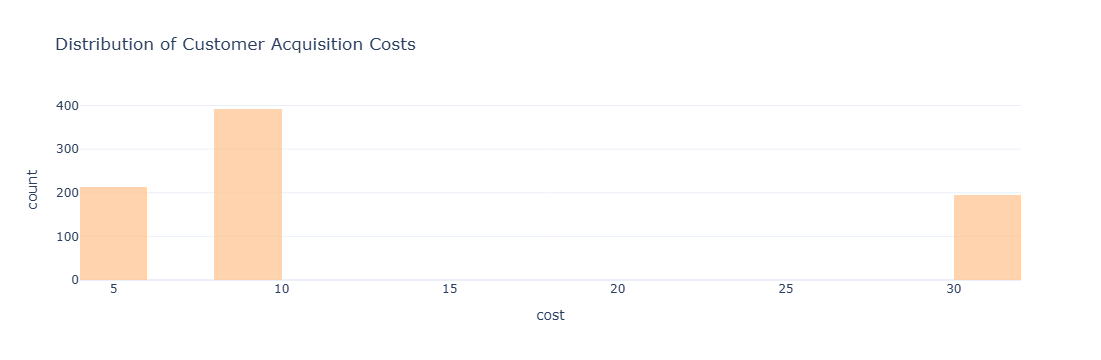

In [33]:
fig= px.histogram(data,x="cost",nbins=20,title="Distribution of Customer Acquisition Costs",color_discrete_sequence=["#FEC89A"],  # Custom color for the histogram
    opacity=0.8 )
fig.show()


# Visualisation for the revenue generated by customers



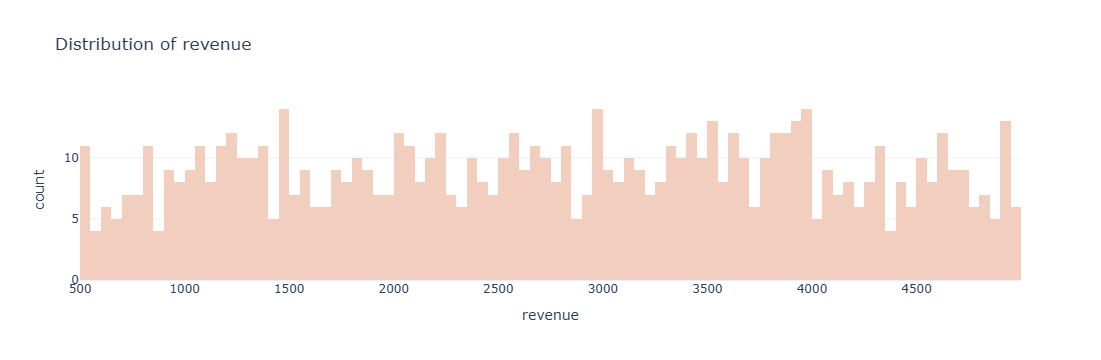

In [39]:
fig= px.histogram(data,x="revenue",nbins=100,title="Distribution of revenue",color_discrete_sequence=["#F1CEBE"])
fig.show()

# Compare the Acquisition Mode across various channels.

In [10]:
Cost_by_channel=data.groupby('channel')['cost'].mean().reset_index()
Cost_by_channel

,channel,cost
0,email marketing,5.246263
1,paid advertising,30.450327
2,referral,8.320327
3,social media,9.546326


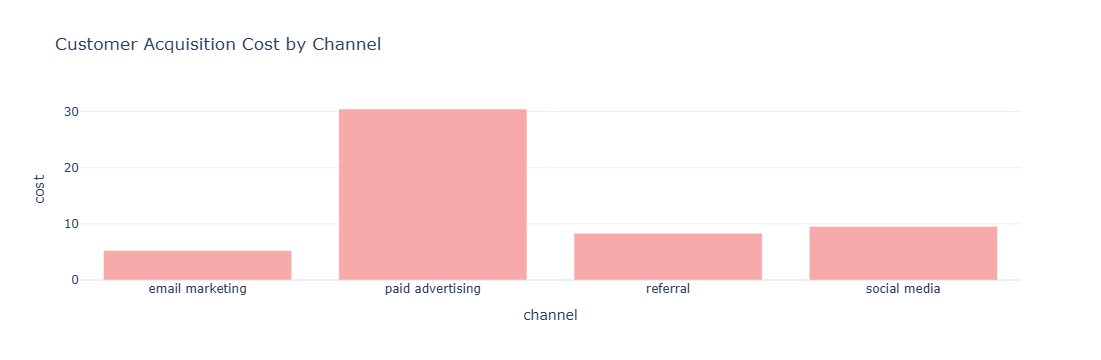

In [41]:
color_palette= colors. qualitative.Pastel

fig=px.bar(Cost_by_channel,x='channel',y='cost',
           title='Customer Acquisition Cost by Channel',color_discrete_sequence=["#F49595"], 
    opacity=0.8 )
fig.show()

# Channels that are the Most and least Effective at converting customers.

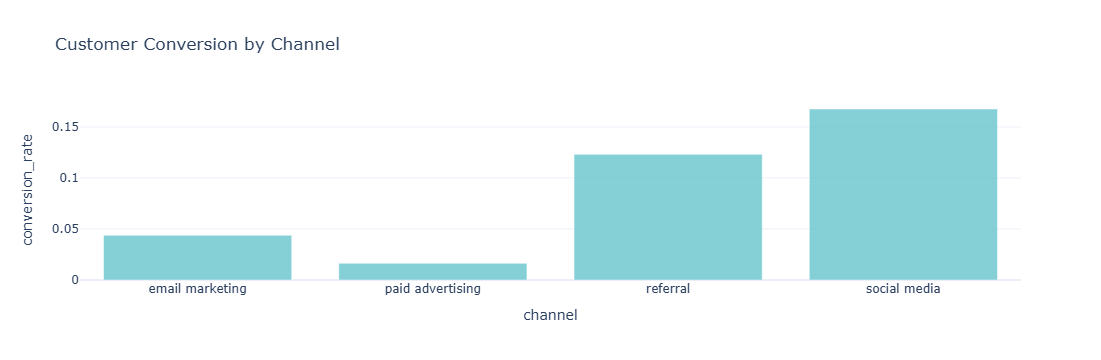

In [42]:
Conversion_by_channel=data.groupby('channel')['conversion_rate'].mean().reset_index()
fig=px.bar(Conversion_by_channel,x='channel',y='conversion_rate',
           title='Customer Conversion by Channel',color_discrete_sequence=px.colors.qualitative.Pastel, 
    opacity=0.8 )
fig.show()

# The total revenue by channel and analyze the most and least profitable channels for generating revenue

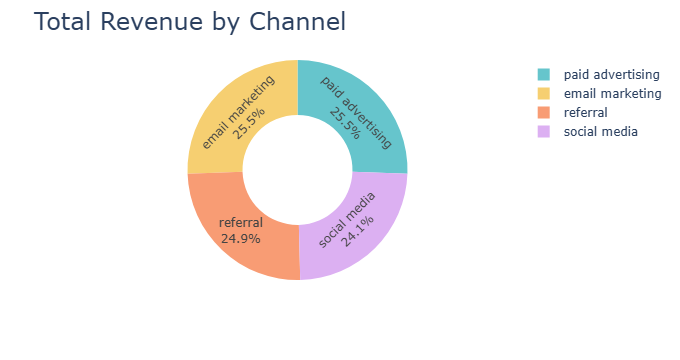

In [26]:
import plotly.colors as colors
revenue_by_channel=data.groupby('channel')['revenue'].mean().reset_index()
fig= px.pie(revenue_by_channel,values='revenue',names='channel',hole=0.5,
            color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Total Revenue by Channel',title_font=dict(size=24))

fig.show()

# calculate the return on investment(ROI) for each channel.

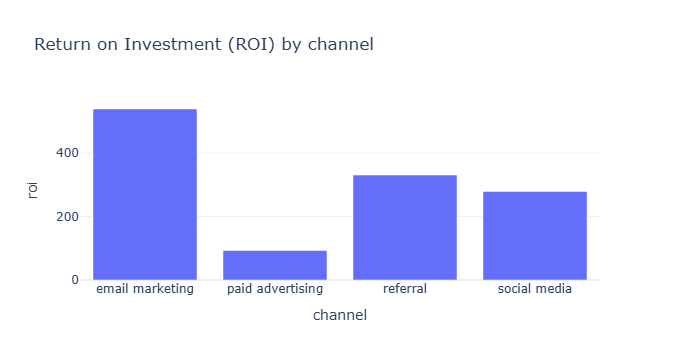

In [30]:
data['roi']=data['revenue']/data['cost']
roi_by_channel=data.groupby('channel')['roi'].mean().reset_index()
fig=px.bar(roi_by_channel,x='channel',y='roi',title='Return on Investment (ROI) by channel')
fig.show()

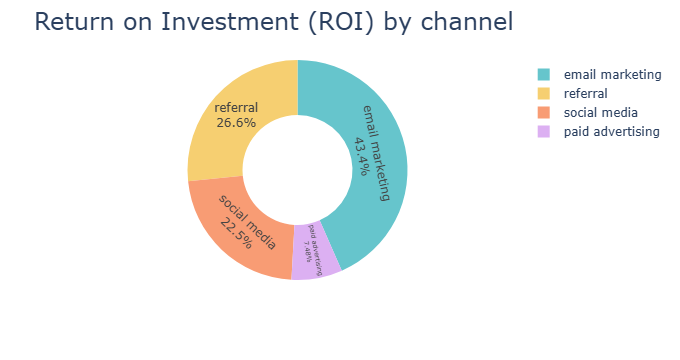

In [31]:
fig= px.pie(roi_by_channel,values='roi',names='channel',hole=0.5,
            color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Return on Investment (ROI) by channel',title_font=dict(size=24))

fig.show()